# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>example 9812</pre>

In [1]:
# student 1: Rotem 3167
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Loading the training data
### Trainset: 

In [3]:
#loading the training data
train_df = pd.read_csv('wine_train.csv')
train_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


### Testset:

In [4]:
#loading the training data
test_df = pd.read_csv('wine_test.csv')
test_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [5]:
trainset_x = train_df.drop(['target'], axis=1)
trainset_y = train_df['target']
# print(trainset_x.shape)
# print(train_df.shape)
testset_x = test_df.drop(['target'], axis=1)
testset_y = test_df['target']

# check for any missing values:
in pycharm some scrolling is advised for both sets 

In [6]:
#missing values (if any)
print("~~~~~~Train~~~~~~")
print(train_df.isnull().sum())
print("~~~~~~Test~~~~~~")
print(test_df.isnull().sum())

~~~~~~Train~~~~~~
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
~~~~~~Test~~~~~~
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0


# EDA
 Getting to know the data with some visual aid

In [7]:
train_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


In [8]:
test_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,13.013889,2.488611,2.385556,19.791667,98.944444,2.212778,1.893889,0.421667,1.705278,5.168056,0.953056,2.504444,764.388889,1.000000
std,0.904962,1.210778,0.238716,3.308550,16.626905,0.569845,0.974970,0.134302,0.678846,2.637680,0.264303,0.676096,309.252950,0.792825
min,11.030000,0.990000,1.950000,14.000000,70.000000,1.350000,0.470000,0.200000,0.410000,1.740000,0.560000,1.270000,315.000000,0.000000
25%,12.320000,1.670000,2.207500,16.950000,89.000000,1.725000,0.897500,0.290000,1.297500,3.292500,0.722500,1.990000,520.000000,0.000000
50%,13.110000,1.900000,2.310000,20.000000,96.000000,2.250000,1.940000,0.425000,1.690000,4.475000,0.975000,2.600000,680.000000,1.000000
75%,13.757500,3.202500,2.560000,22.000000,102.250000,2.755000,2.765000,0.530000,2.042500,6.337500,1.092500,2.932500,1001.250000,2.000000
max,14.830000,5.800000,2.920000,28.500000,162.000000,3.100000,3.400000,0.660000,3.280000,13.000000,1.710000,3.920000,1510.000000,2.000000


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
 13  targe

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       36 non-null     float64
 1   malic_acid                    36 non-null     float64
 2   ash                           36 non-null     float64
 3   alcalinity_of_ash             36 non-null     float64
 4   magnesium                     36 non-null     float64
 5   total_phenols                 36 non-null     float64
 6   flavanoids                    36 non-null     float64
 7   nonflavanoid_phenols          36 non-null     float64
 8   proanthocyanins               36 non-null     float64
 9   color_intensity               36 non-null     float64
 10  hue                           36 non-null     float64
 11  od280/od315_of_diluted_wines  36 non-null     float64
 12  proline                       36 non-null     float64
 13  target 

# Checking for duplicates over the data sets

In [11]:
print("duplicate rows in train dataset")
print(train_df.duplicated().sum())

print("\nduplicate rows in test dataset")
print(test_df.duplicated().sum())

duplicate rows in train dataset
0

duplicate rows in test dataset
0


# Visualization

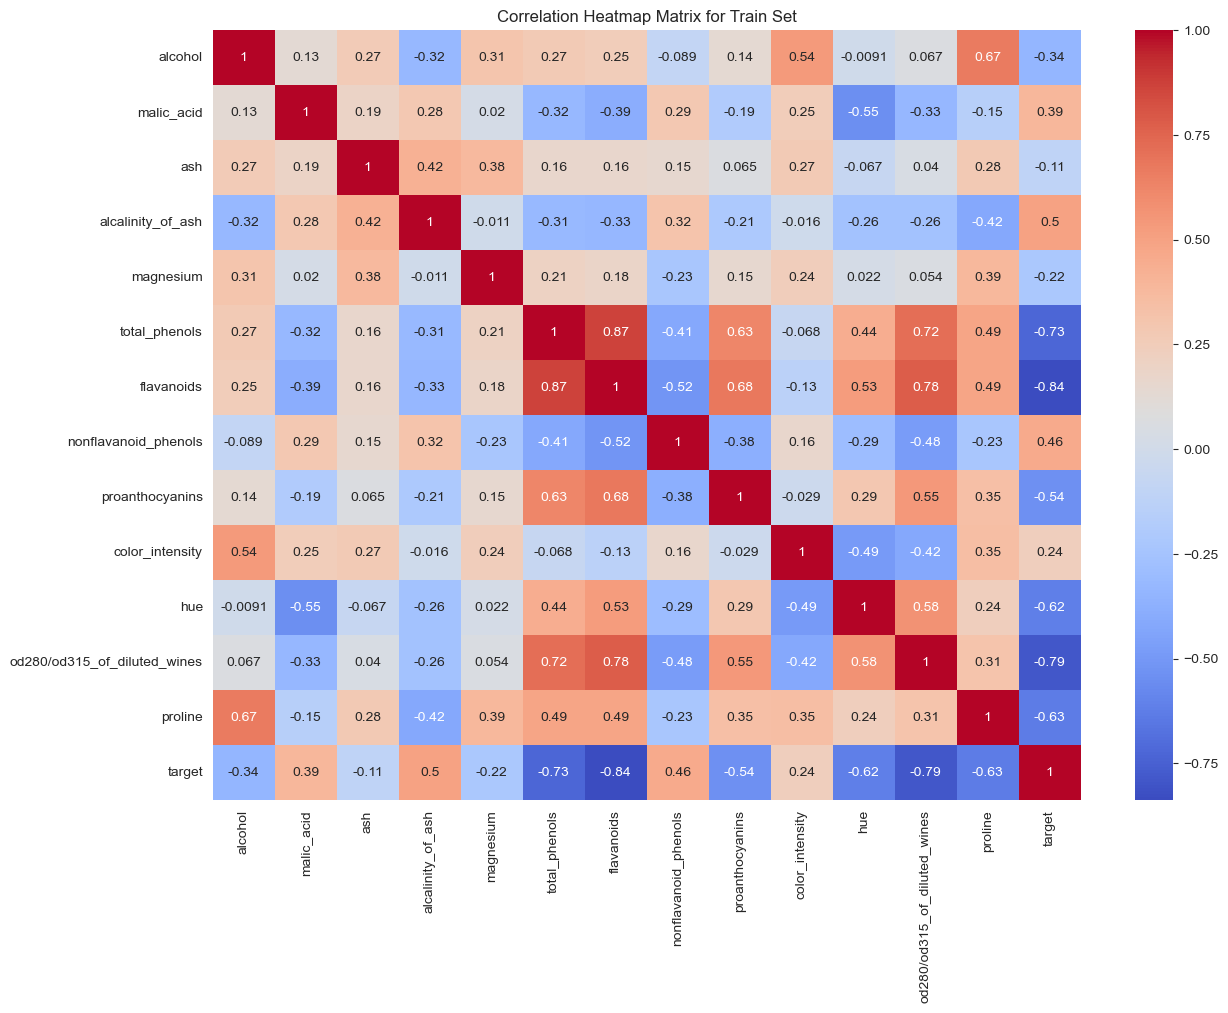

In [12]:

plt.figure(figsize=(14,10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Matrix for Train Set')
plt.show()

### Drill down into specifics:
seems like different cultivators use more *Flavanoids* (probably more grapes per bottle) which seems to be heavily correlated to *Phenols*


Text(0.5, 1.0, 'flavanoids VS total phenotype')

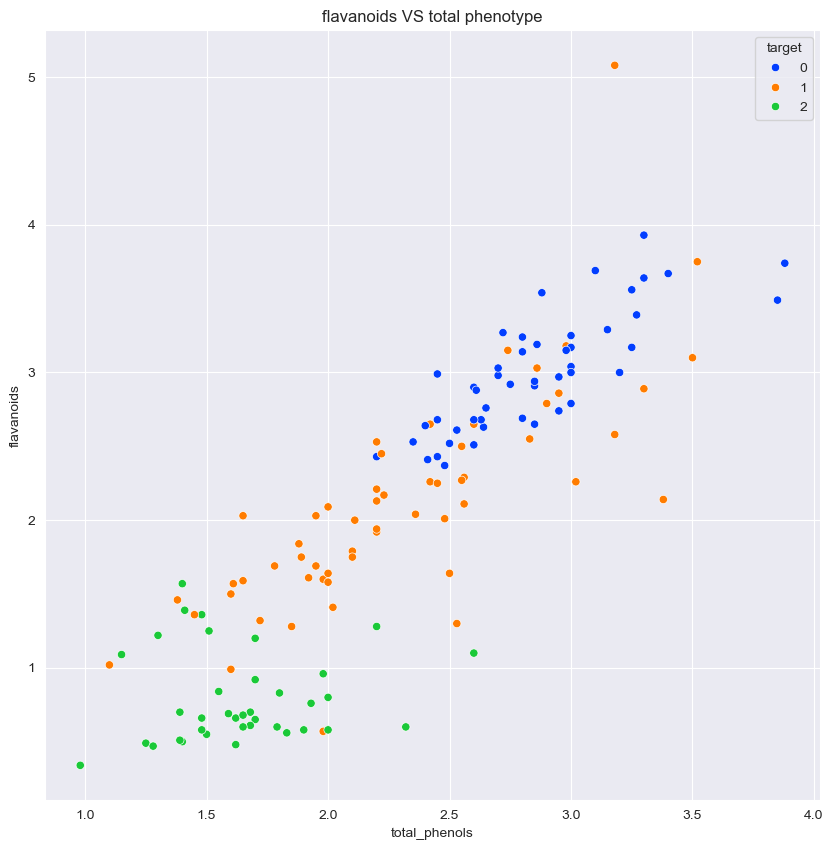

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='total_phenols', y = 'flavanoids', data=trainset_x, hue=trainset_y, palette='bright')
plt.title('flavanoids VS total phenotype')

### is it possible more flavanoids could lead to more alcohol in the wine?
seems like the two are barely related (difficult to see but the heat map will tell us the correlation of those two is 0.25) 

Text(0.5, 1.0, 'Flavanoids VS Alcohol')

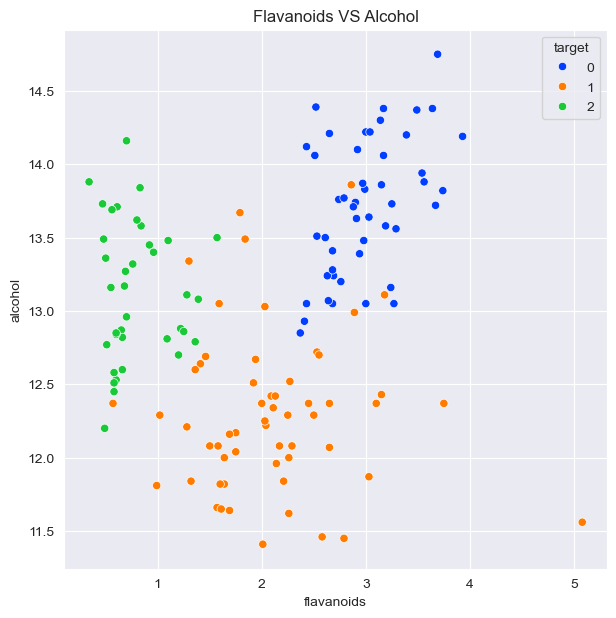

In [14]:
plt.figure(figsize=(7,7))
# sns.barplot(x='target', y='alcohol', data=train_df)
sns.scatterplot(x='flavanoids', y = 'alcohol', data=trainset_x, hue=trainset_y, palette='bright')
plt.title('Flavanoids VS Alcohol')

## Part 3 - Experiments
You could add as many code cells as needed

Dimensional reduction - PCA

In [15]:
# Standardize features (important for PCA, SVC, KNN)
scaler = StandardScaler()

# Define PCA for dimensionality reduction
pca = PCA()

In [16]:
# Define models
svc = SVC()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

# Define pipelines: PCA + Model
pipelines = {
    'SVC': Pipeline([('scaler', scaler), ('pca', pca), ('svc', svc)]),
    'RandomForest': Pipeline([('scaler', scaler), ('pca', pca), ('rf', rf)]),
    'KNN': Pipeline([('scaler', scaler), ('pca', pca), ('knn', knn)])
}

# Hyperparameter grids for each model
param_grids = {
    'SVC': {
        'pca__n_components': [5, 10, 12],  # Number of components to keep in PCA
        'svc__kernel': ['linear', 'rbf'],
        'svc__C': [0.1, 1, 10],
        'svc__gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'pca__n_components': [5, 10, 12],
        'rf__n_estimators': [100, 200],
        'rf__max_depth': [None, 10, 20],
        'rf__min_samples_split': [2, 5]
    },
    'KNN': {
        'pca__n_components': [5, 10, 12],
        'knn__n_neighbors': [3, 5, 7],
        'knn__weights': ['uniform', 'distance'],
        'knn__p': [1, 2]
    }
}

# Define a macro-average F1 score as the evaluation metric
f1_macro = make_scorer(f1_score, average='macro')

### Results

In [17]:
# Results container to store the best results for each model
results = {}

# Loop through models and perform grid search with cross-validation
for model_name, pipeline in pipelines.items():
    print(f"Running GridSearchCV for {model_name}...")
    
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grids[model_name], scoring=f1_macro, cv=5, n_jobs=-1)
    grid_search.fit(trainset_x, trainset_y)
    
    # Store the best results
    results[model_name] = {
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    }
    
    

Running GridSearchCV for SVC...
Running GridSearchCV for RandomForest...
Running GridSearchCV for KNN...


### checking to see which model is best for this scenario:

In [18]:
# Convert results to a dataframe for comparison
results_df = pd.DataFrame(results).T
print(results_df)

# Output the best model and its hyperparameters
best_model_name = results_df['best_score'].idxmax()
print(f"Best Model: {best_model_name} with F1-macro score: {results_df.loc[best_model_name, 'best_score']}")
print(f"Best Hyperparameters: {results_df.loc[best_model_name, 'best_params']}")

             best_score                                        best_params
SVC            0.978711  {'pca__n_components': 10, 'svc__C': 0.1, 'svc_...
RandomForest   0.972852  {'pca__n_components': 10, 'rf__max_depth': 10,...
KNN            0.965044  {'knn__n_neighbors': 5, 'knn__p': 2, 'knn__wei...
Best Model: SVC with F1-macro score: 0.9787114845938376
Best Hyperparameters: {'pca__n_components': 10, 'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


### best model turned out to be SVC :)

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [19]:
best_params = results_df.loc[best_model_name, 'best_params']
best_pipeline = pipelines[best_model_name] # Retrieve the pipeline for the best model
best_pipeline.set_params(**best_params)
best_pipeline.fit(trainset_x, trainset_y) # Train the best model on the full training set


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                ('svc', SVC(C=0.1, kernel='linear'))])

## Part 5 - Apply on test and show model performance estimation

using the same pipeline of best results from training for the test set **not re-training**

In [20]:
# Use the same trained best_pipeline to predict test set
test_predictions = best_pipeline.predict(testset_x)

# Evaluate the performance on the test set
accuracy = accuracy_score(testset_y, test_predictions)
print(f"Accuracy on the test set: {accuracy:.4f}")

# Generate a classification report (Precision, Recall, F1 scores for each class)
class_report = classification_report(testset_y, test_predictions)
print("Classification Report:")
print(class_report)

Accuracy on the test set: 0.9722
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



## showing the first 5 values

In [21]:
print(f"predictions: \n {test_predictions[:5]}")
print(f"actual values: \n{testset_y[:5].values}")

predictions: 
 [2 0 2 1 2]
actual values: 
[2 0 2 1 2]


# cross validations

In [22]:
cv_results = pd.DataFrame(grid_search.cv_results_)

print("\nBest cross-validation performance (mean and standard deviation of F1-macro score):")
mean_test_score = grid_search.best_score_
std_test_score = cv_results.loc[grid_search.best_index_, 'std_test_score']

print(f"Mean F1-macro score during 5-fold cross-validation: {mean_test_score:.4f}")
print(f"Standard deviation of F1-macro score during 5-fold cross-validation: {std_test_score:.4f}")



Best cross-validation performance (mean and standard deviation of F1-macro score):
Mean F1-macro score during 5-fold cross-validation: 0.9650
Standard deviation of F1-macro score during 5-fold cross-validation: 0.0548
